# Sales-Prediction

The aim is to build a model which predicts sales on the money spent on different platform such as TV, radio, and newspaper for marketing.

In [1]:
# Importing the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset

dataset = pd.read_csv("advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Pre-Processing

In [3]:
dataset.shape

(200, 4)

**1. Checking for missing values**

In [4]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Conclusion**: The dataset does not have missing values

**2. Checking for duplicate rows**

In [5]:
dataset.duplicated().any()

False

**Conclusion:** There are no duplicate rows present in the dataset

**3. Checking for outliers**

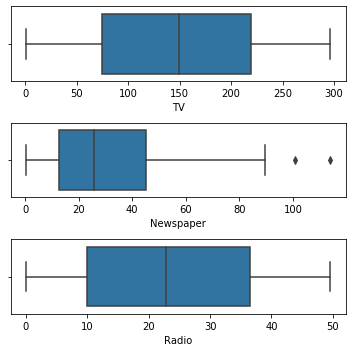

In [6]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'],ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])

plt.tight_layout()

 **Conclusion:** There are not that extreme values present in the dataset

# Exploratory Data Anaysis

**1. Distribution of the target variable**

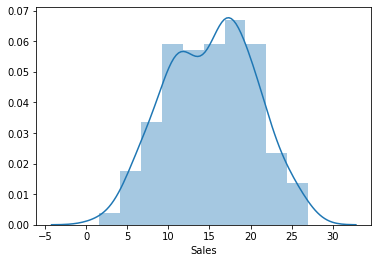

In [7]:
sns.distplot(dataset['Sales'])

**Conclusion:** It is normally distributed

**2. How Sales are related with other variables**

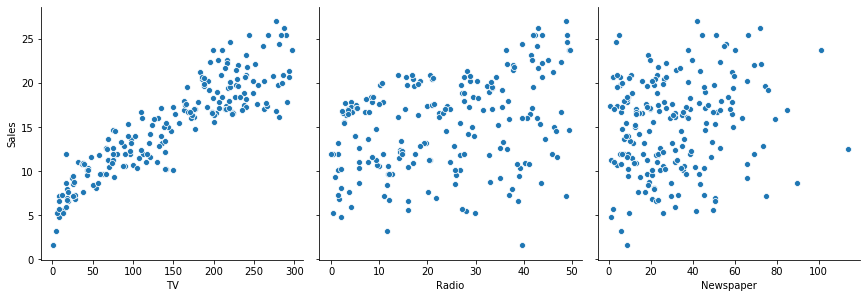

In [14]:
sns.pairplot(dataset, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4,aspect=1, kind='scatter')

**Conclusion:** TV is strongly, positively, linearly correlated with the target variable. But the Newspaper and Radio feature seems to be uncorrelated

**3. Heatmap**

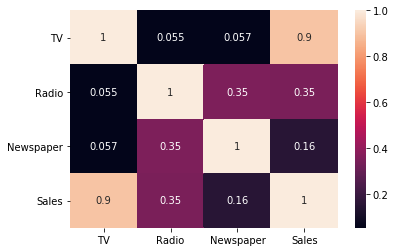

In [15]:
sns.heatmap(dataset.corr(), annot=True)

**Conclusion:** TV seems to be most correlated with Sales as 0.9 is very close to 1

# Model Building

Linear Regression is a useful tool for predicting a quantitative response.

Prediction using:

1. Simple Linear Regression
2. Multiple Linear Regression




**1. Simple Linear Regression**

Simple linear regression has only one x and one y variable. It is an approach for predicting a quantitative response using a single feature.

It establishes the relationship between two variables using a straight line. Linear regression attempts to draw a line that comes closest to the data by finding the slope and intercept that define the line and minimize regression errors.

**Formula:** Y = β0 + β1X + e

Y = Dependent variable / Target variable
β0 = Intercept of the regression line 
β1 = Slope of the regression lime which tells whether the line is increasing or decreasing
X = Independent variable / Predictor variable
e = Error

**Equation:** Sales = β0 + β1X + TV

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
# Setting the values for x and y

x = dataset[['TV']]
y = dataset[['Sales']]

In [19]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100) 

In [20]:
# Implementing the linear model
# Fitting the Linear Regression model

slr = LinearRegression().fit(x_train,y_train)

In [21]:
#Intercept and coefficient

print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  [6.9486832]
Coefficient:  [[0.05454575]]


#### Regression Equation: Sales = 6.948 + 0.054 * TV

 From the above-obtained equation for the Simple Linear Regression Model, we can see that the value of intercept is 6.948, which shows that if we keep the money spent on TV for advertisement as 0, the estimated average sales will be 6.948 and a single rupee increase in the money spent on TV for advertisement increases sales by 0.054.

In [23]:
# Prediction of test set

y_pred_slr = slr.predict(x_test)

# Predicted values

print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [[ 7.37414007]
 [19.94148154]
 [14.32326899]
 [18.82329361]
 [20.13239168]
 [18.2287449 ]
 [14.54145201]
 [17.72692398]
 [18.75238413]
 [18.77420243]
 [13.34144544]
 [19.46693349]
 [10.01415451]
 [17.1923756 ]
 [11.70507285]
 [12.08689312]
 [15.11418241]
 [16.23237035]
 [15.8669138 ]
 [13.1068987 ]
 [18.65965635]
 [14.00690363]
 [17.60692332]
 [16.60328147]
 [17.03419291]
 [18.96511257]
 [18.93783969]
 [11.05597839]
 [17.03419291]
 [13.66326538]
 [10.6796127 ]
 [10.71234015]
 [13.5487193 ]
 [17.22510305]
 [ 9.67597085]
 [13.52144643]
 [12.25053038]
 [16.13418799]
 [19.07965865]
 [17.48692266]
 [18.69783838]
 [16.53237199]
 [15.92145955]
 [18.86693021]
 [13.5050827 ]
 [11.84143724]
 [ 7.87050642]
 [20.51966653]
 [10.79961336]
 [ 9.03233096]
 [17.99419817]
 [16.29237067]
 [11.04506924]
 [14.09963141]
 [18.44147334]
 [ 9.3759692 ]
 [ 7.88687015]
 [ 8.34505447]
 [17.72692398]
 [11.62325422]]


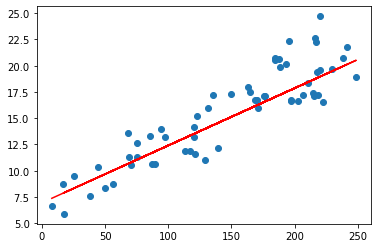

In [24]:
# Line of best fit

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_slr, 'Red')
plt.show()

In [26]:
# Check result 
# r_sq value 

r_sq = slr.score(x_train,y_train)
print('Coefficient of determination: ', r_sq)

Coefficient of determination:  0.8157933136480389


**Conclusion:** 81.10% of the data fit the regression model

### Model Evaluation



In [28]:
# 0 means the model is perfect. Therefore the value should be as colse to 0 as possible

meanAbErr = metrics.mean_absolute_error(y_test,y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test,y_pred_slr)
rootMeanSqErr = np.sqrt(meanSqErr)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.6480589869746527
Mean Square Error: 4.077556371826949
Root Mean Square Error: 2.019296008966231


# Multiple Linear Regression 

Multiple linear regression has one y and two or more x variables. It is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

Assumptions for Multiple Linear Regression:

1. A linear relationship should exist between the Target and predictor variables.
2. The regression residuals must be normally distributed.
3. MLR assumes little or no multicollinearity (correlation between the independent variable) in data.

**Formula:** Y = β0 + β1X1 + β2X2 + β3X3 + ... + βnXn + e

Y = Dependent variable / Target variable
β0 = Intercept of the regression line 
β1, β2,..βn = Slope of the regression lime which tells whether the line is increasing or decreasing
X1, X2,..Xn = Independent variables / Predictor variables
e = Error

**Equation:** Sales = β0 + (β1 TV) + (β2 Radio) + (β3 * Newspaper)

In [29]:
#Setting the values of x and y

x = dataset[['TV','Radio','Newspaper']]
y = dataset['Sales']

In [30]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [32]:

# Fitting the Multiple Linear Regression model
mlr = LinearRegression().fit(x_train,y_train)


In [34]:
#Printing the model coefficients 
print(mlr.intercept_)

#pair of features names with the coefficients
list(zip(x,mlr.coef_))

4.334595861728431


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558062),
 ('Newspaper', 0.0062899501461303525)]

In [36]:
#Predicting the Test set result;

y_pred_mlr = mlr.predict(x_test)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [37]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 90.11


**Conclusion:** 90.21% of the data fit the multiple regression model

**Model Evaluation**

In [38]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.2278183566589407
Mean Square Error: 2.6360765623280638
Root Mean Square Error: 1.6235998775338905
